# 파일 불러오기 및 전처리

In [1]:
import os
import pandas as pd
import missingno as msno

rating_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/ratings.dat'
ratings_cols = ['user_id', 'movie_id','rating', 'timestamp']
ratings = pd.read_csv(rating_file_path, sep='::', names=ratings_cols, engine='python')
orginal_data_size = len(ratings)
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [2]:
# 3점 이상만 남깁니다.
ratings = ratings[ratings['rating']>=3]
filtered_data_size = len(ratings)

print(f'orginal_data_size: {orginal_data_size}, filtered_data_size: {filtered_data_size}')
print(f'Ratio of Remaining Data is {filtered_data_size / orginal_data_size:.2%}')

orginal_data_size: 1000209, filtered_data_size: 836478
Ratio of Remaining Data is 83.63%


In [3]:
# rating 컬럼의 이름을 play로 바꿉니다.
ratings.rename(columns={'rating':'play'}, inplace=True)

In [4]:
ratings.head()

,user_id,movie_id,play,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


## ratings 데이터프레임 정보 및 결측치 확인

In [5]:
ratings['movie_id'].nunique()

3628

In [6]:
ratings['user_id'].nunique()

6039

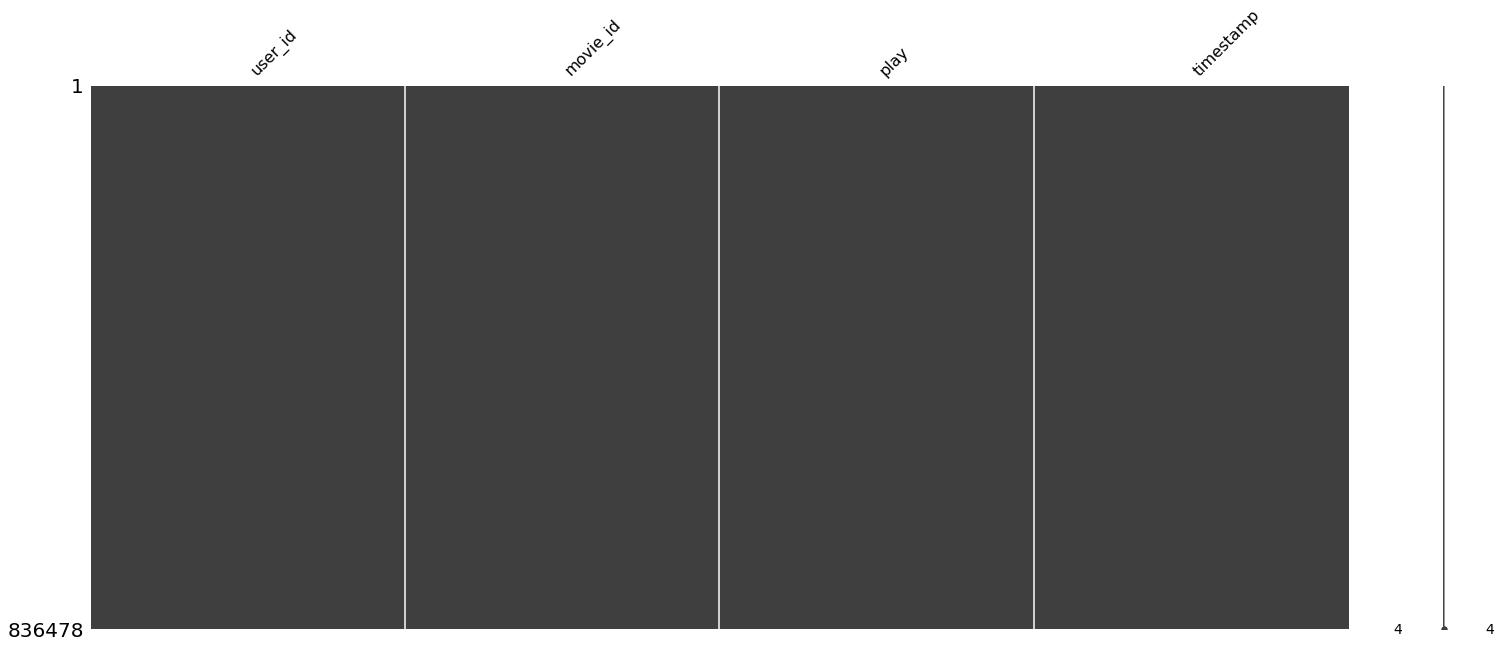

In [7]:
msno.matrix(ratings)

In [8]:
# 영화 제목을 보기 위해 메타 데이터를 읽어옵니다.
movie_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/movies.dat'
cols = ['movie_id', 'title', 'genre'] 
movies = pd.read_csv(movie_file_path, sep='::', names=cols, engine='python')
movies.title = movies.title.str.replace(' ', '_')
movies.head()

,movie_id,title,genre
0,1,Toy_Story_(1995),Animation|Children's|Comedy
1,2,Jumanji_(1995),Adventure|Children's|Fantasy
2,3,Grumpier_Old_Men_(1995),Comedy|Romance
3,4,Waiting_to_Exhale_(1995),Comedy|Drama
4,5,Father_of_the_Bride_Part_II_(1995),Comedy


## movies 데이터프레임 정보 및 결측치 확인

In [9]:
movies['movie_id'].nunique()

3883

In [10]:
movies['title'].nunique()

3883

In [11]:
movies['genre'].nunique()

301

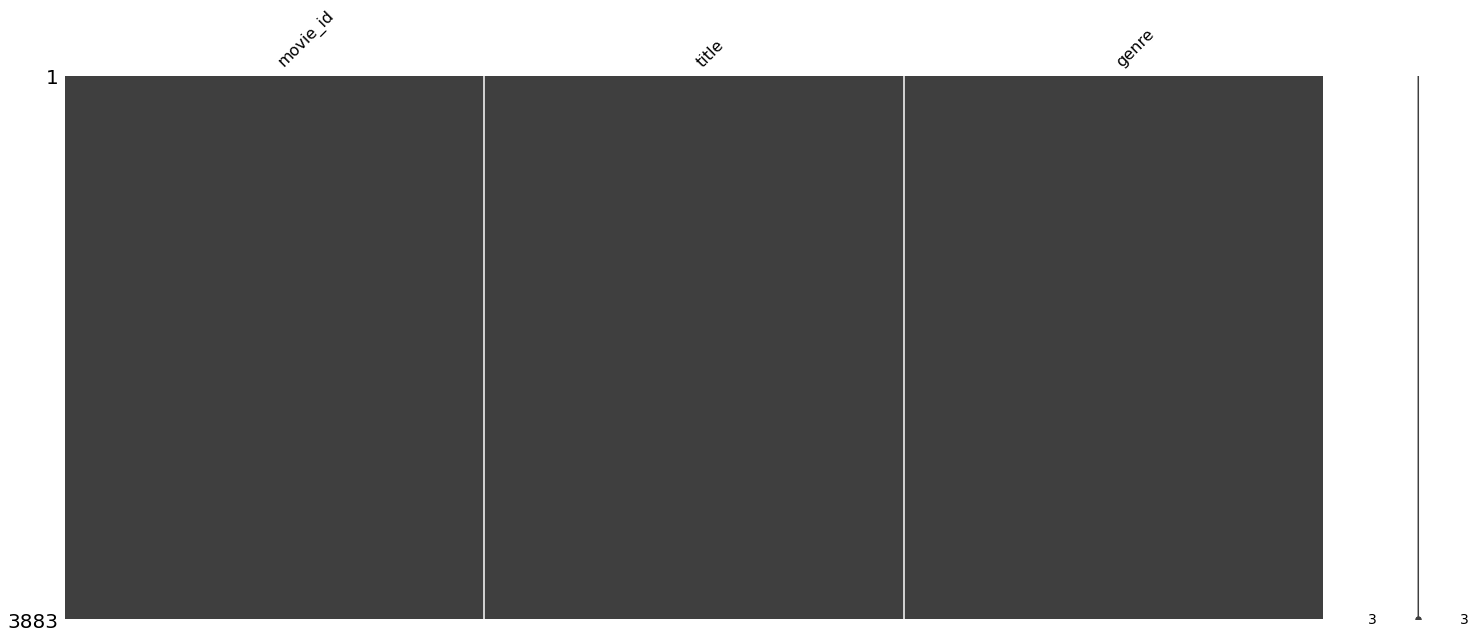

In [12]:
msno.matrix(movies)

In [13]:
# 유저, 영화 indexing 하는 코드 idx는 index의 약자입니다.
idx_to_movie = {i:v for i,v in zip(movies['movie_id'],movies['title'])}
movie_to_idx = {v:i for i,v in zip(movies['movie_id'],movies['title'])}

In [14]:
idx_to_movie

{1: 'Toy_Story_(1995)',
 2: 'Jumanji_(1995)',
 3: 'Grumpier_Old_Men_(1995)',
 4: 'Waiting_to_Exhale_(1995)',
 5: 'Father_of_the_Bride_Part_II_(1995)',
 6: 'Heat_(1995)',
 7: 'Sabrina_(1995)',
 8: 'Tom_and_Huck_(1995)',
 9: 'Sudden_Death_(1995)',
 10: 'GoldenEye_(1995)',
 11: 'American_President,_The_(1995)',
 12: 'Dracula:_Dead_and_Loving_It_(1995)',
 13: 'Balto_(1995)',
 14: 'Nixon_(1995)',
 15: 'Cutthroat_Island_(1995)',
 16: 'Casino_(1995)',
 17: 'Sense_and_Sensibility_(1995)',
 18: 'Four_Rooms_(1995)',
 19: 'Ace_Ventura:_When_Nature_Calls_(1995)',
 20: 'Money_Train_(1995)',
 21: 'Get_Shorty_(1995)',
 22: 'Copycat_(1995)',
 23: 'Assassins_(1995)',
 24: 'Powder_(1995)',
 25: 'Leaving_Las_Vegas_(1995)',
 26: 'Othello_(1995)',
 27: 'Now_and_Then_(1995)',
 28: 'Persuasion_(1995)',
 29: 'City_of_Lost_Children,_The_(1995)',
 30: 'Shanghai_Triad_(Yao_a_yao_yao_dao_waipo_qiao)_(1995)',
 31: 'Dangerous_Minds_(1995)',
 32: 'Twelve_Monkeys_(1995)',
 33: 'Wings_of_Courage_(1995)',
 34: 'Babe_(1

In [15]:
movie_to_idx

{'Toy_Story_(1995)': 1,
 'Jumanji_(1995)': 2,
 'Grumpier_Old_Men_(1995)': 3,
 'Waiting_to_Exhale_(1995)': 4,
 'Father_of_the_Bride_Part_II_(1995)': 5,
 'Heat_(1995)': 6,
 'Sabrina_(1995)': 7,
 'Tom_and_Huck_(1995)': 8,
 'Sudden_Death_(1995)': 9,
 'GoldenEye_(1995)': 10,
 'American_President,_The_(1995)': 11,
 'Dracula:_Dead_and_Loving_It_(1995)': 12,
 'Balto_(1995)': 13,
 'Nixon_(1995)': 14,
 'Cutthroat_Island_(1995)': 15,
 'Casino_(1995)': 16,
 'Sense_and_Sensibility_(1995)': 17,
 'Four_Rooms_(1995)': 18,
 'Ace_Ventura:_When_Nature_Calls_(1995)': 19,
 'Money_Train_(1995)': 20,
 'Get_Shorty_(1995)': 21,
 'Copycat_(1995)': 22,
 'Assassins_(1995)': 23,
 'Powder_(1995)': 24,
 'Leaving_Las_Vegas_(1995)': 25,
 'Othello_(1995)': 26,
 'Now_and_Then_(1995)': 27,
 'Persuasion_(1995)': 28,
 'City_of_Lost_Children,_The_(1995)': 29,
 'Shanghai_Triad_(Yao_a_yao_yao_dao_waipo_qiao)_(1995)': 30,
 'Dangerous_Minds_(1995)': 31,
 'Twelve_Monkeys_(1995)': 32,
 'Wings_of_Courage_(1995)': 33,
 'Babe_(1995)

merge함수 대신 map함수 사용해서 데이터프레임에 movie_name column추가하기

In [16]:
ratings['movie_name'] = ratings['movie_id'].map(idx_to_movie)

In [17]:
print(type(ratings))
ratings

<class 'pandas.core.frame.DataFrame'>


,user_id,movie_id,play,timestamp,movie_name
0,1,1193,5,978300760,One_Flew_Over_the_Cuckoo's_Nest_(1975)
1,1,661,3,978302109,James_and_the_Giant_Peach_(1996)
2,1,914,3,978301968,My_Fair_Lady_(1964)
3,1,3408,4,978300275,Erin_Brockovich_(2000)
4,1,2355,5,978824291,"Bug's_Life,_A_(1998)"
...,...,...,...,...,...
1000203,6040,1090,3,956715518,Platoon_(1986)
1000205,6040,1094,5,956704887,"Crying_Game,_The_(1992)"
1000206,6040,562,5,956704746,Welcome_to_the_Dollhouse_(1995)
1000207,6040,1096,4,956715648,Sophie's_Choice_(1982)


### ratings에 있는 유니크한 영화 개수

In [18]:
ratings['movie_id'].nunique()

3628

### ratings에 있는 유니크한 사용자 수

In [19]:
ratings['user_id'].nunique()

6039

### 가장 인기있는 영화 30개(인기순)

In [20]:
top_movie = ratings.groupby('movie_name')['user_id'].count()
top_movie.sort_values(ascending=False).head(30) # ascending=True 로 하면 인기없는 영화부터 보여준다

movie_name
American_Beauty_(1999)                                   3211
Star_Wars:_Episode_IV_-_A_New_Hope_(1977)                2910
Star_Wars:_Episode_V_-_The_Empire_Strikes_Back_(1980)    2885
Star_Wars:_Episode_VI_-_Return_of_the_Jedi_(1983)        2716
Saving_Private_Ryan_(1998)                               2561
Terminator_2:_Judgment_Day_(1991)                        2509
Silence_of_the_Lambs,_The_(1991)                         2498
Raiders_of_the_Lost_Ark_(1981)                           2473
Back_to_the_Future_(1985)                                2460
Matrix,_The_(1999)                                       2434
Jurassic_Park_(1993)                                     2413
Sixth_Sense,_The_(1999)                                  2385
Fargo_(1996)                                             2371
Braveheart_(1995)                                        2314
Men_in_Black_(1997)                                      2297
Schindler's_List_(1993)                                  22

### 내가 선호하는 영화 5개를 rating에 추가하기

In [21]:
ratings = ratings[['user_id','movie_name','play']]

my_favorite = ['Godfather,_The_(1972)',
               'Star_Wars:_Episode_IV_-_A_New_Hope_(1977)',
               'Star_Wars:_Episode_V_-_The_Empire_Strikes_Back_(1980)',
               'Men_in_Black_(1997)',
               'Star_Wars:_Episode_VI_-_Return_of_the_Jedi_(1983)']

my_movielist = pd.DataFrame({'user_id': ['JPark']*5, 'movie_name': my_favorite, 'play':[5]*5})

if not ratings.isin({'user_id':['JPark']})['user_id'].any():
    ratings = ratings.append(my_movielist)
    
ratings.tail(10)

,user_id,movie_name,play
1000203,6040,Platoon_(1986),3
1000205,6040,"Crying_Game,_The_(1992)",5
1000206,6040,Welcome_to_the_Dollhouse_(1995),5
1000207,6040,Sophie's_Choice_(1982),4
1000208,6040,E.T._the_Extra-Terrestrial_(1982),4
0,JPark,"Godfather,_The_(1972)",5
1,JPark,Star_Wars:_Episode_IV_-_A_New_Hope_(1977),5
2,JPark,Star_Wars:_Episode_V_-_The_Empire_Strikes_Back...,5
3,JPark,Men_in_Black_(1997),5
4,JPark,Star_Wars:_Episode_VI_-_Return_of_the_Jedi_(1983),5


### 전처리후 데이터 전부 숫자로 인덱싱하기

In [22]:
user_unique = ratings['user_id'].unique()
title_unique = ratings['movie_name'].unique()

# 유저, 영화 indexing 하는 코드 idx는 index의 약자입니다.
user_to_idx = {v:k for k,v in enumerate(user_unique)}
title_to_idx = {v:k for k,v in enumerate(title_unique)}
idx_to_title = {k:v for k,v in enumerate(title_unique)}

# 인덱싱이 잘 되었는지 확인해 봅니다. 
print(user_to_idx['JPark'])    # 6040명의 유저 중 마지막으로 추가된 유저이니 6039이 나와야 합니다. 
print(title_to_idx['Men_in_Black_(1997)'])

6039
175


In [23]:
user_to_idx

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 31,
 33: 32,
 34: 33,
 35: 34,
 36: 35,
 37: 36,
 38: 37,
 39: 38,
 40: 39,
 41: 40,
 42: 41,
 43: 42,
 44: 43,
 45: 44,
 46: 45,
 47: 46,
 48: 47,
 49: 48,
 50: 49,
 51: 50,
 52: 51,
 53: 52,
 54: 53,
 55: 54,
 56: 55,
 57: 56,
 58: 57,
 59: 58,
 60: 59,
 61: 60,
 62: 61,
 63: 62,
 64: 63,
 65: 64,
 66: 65,
 67: 66,
 68: 67,
 69: 68,
 70: 69,
 71: 70,
 72: 71,
 73: 72,
 74: 73,
 75: 74,
 76: 75,
 77: 76,
 78: 77,
 79: 78,
 80: 79,
 81: 80,
 82: 81,
 83: 82,
 84: 83,
 85: 84,
 86: 85,
 87: 86,
 88: 87,
 89: 88,
 90: 89,
 91: 90,
 92: 91,
 93: 92,
 94: 93,
 95: 94,
 96: 95,
 97: 96,
 98: 97,
 99: 98,
 100: 99,
 101: 100,
 102: 101,
 103: 102,
 104: 103,
 105: 104,
 106: 105,
 107: 106,
 108: 107,
 109: 108,
 110: 109,
 111: 11

In [24]:
title_to_idx

{"One_Flew_Over_the_Cuckoo's_Nest_(1975)": 0,
 'James_and_the_Giant_Peach_(1996)': 1,
 'My_Fair_Lady_(1964)': 2,
 'Erin_Brockovich_(2000)': 3,
 "Bug's_Life,_A_(1998)": 4,
 'Princess_Bride,_The_(1987)': 5,
 'Ben-Hur_(1959)': 6,
 'Christmas_Story,_A_(1983)': 7,
 'Snow_White_and_the_Seven_Dwarfs_(1937)': 8,
 'Wizard_of_Oz,_The_(1939)': 9,
 'Beauty_and_the_Beast_(1991)': 10,
 'Gigi_(1958)': 11,
 'Miracle_on_34th_Street_(1947)': 12,
 "Ferris_Bueller's_Day_Off_(1986)": 13,
 'Sound_of_Music,_The_(1965)': 14,
 'Airplane!_(1980)': 15,
 'Tarzan_(1999)': 16,
 'Bambi_(1942)': 17,
 'Awakenings_(1990)': 18,
 'Big_(1988)': 19,
 'Pleasantville_(1998)': 20,
 'Wallace_&_Gromit:_The_Best_of_Aardman_Animation_(1996)': 21,
 'Back_to_the_Future_(1985)': 22,
 "Schindler's_List_(1993)": 23,
 'Meet_Joe_Black_(1998)': 24,
 'Pocahontas_(1995)': 25,
 'E.T._the_Extra-Terrestrial_(1982)': 26,
 'Titanic_(1997)': 27,
 'Ponette_(1996)': 28,
 'Close_Shave,_A_(1995)': 29,
 'Antz_(1998)': 30,
 'Girl,_Interrupted_(1999)':

In [25]:
#type of (nunique: int, unique: list)

In [26]:
temp_user_data = ratings['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(ratings):   # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    ratings['user_id'] = temp_user_data   # data['user_id']을 인덱싱된 Series로 교체해 줍니다. 
else:
    print('user_id column indexing Fail!!')

# artist_to_idx을 통해 movie 컬럼도 동일한 방식으로 인덱싱해 줍니다. 
temp_title_data = ratings['movie_name'].map(title_to_idx.get).dropna()
if len(temp_title_data) == len(ratings):
    print('movie_name column indexing OK!!')
    ratings['movie_name'] = temp_title_data
else:
    print('movie_name column indexing Fail!!')

ratings

user_id column indexing OK!!
movie_name column indexing OK!!


,user_id,movie_name,play
0,0,0,5
1,0,1,3
2,0,2,3
3,0,3,4
4,0,4,5
...,...,...,...
0,6039,607,5
1,6039,44,5
2,6039,117,5
3,6039,175,5


# CSR matrix 만들기

In [27]:
from scipy.sparse import csr_matrix

num_user = ratings['user_id'].nunique()
num_movie = ratings['movie_name'].nunique()

csr_data = csr_matrix((ratings.play, (ratings.user_id, ratings.movie_name)), shape=(num_user, num_movie))
csr_data

<6040x3628 sparse matrix of type '<class 'numpy.int64'>'
	with 836483 stored elements in Compressed Sparse Row format>

# als_model = AlternatingLeastSquares 모델구성 및 트레이닝

In [28]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

# implicit 라이브러리에서 권장하고 있는 부분입니다. 학습 내용과는 무관합니다.
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

In [29]:
# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=100, regularization=0.01, 
                                    use_gpu=False, iterations=15, dtype=np.float32)

In [30]:
# als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose해줍니다.)
csr_data_transpose = csr_data.T
csr_data_transpose

<3628x6040 sparse matrix of type '<class 'numpy.int64'>'
	with 836483 stored elements in Compressed Sparse Column format>

In [31]:
# 모델 훈련
als_model.fit(csr_data_transpose)

# 내가 선호하는 5가지 영화 중 두가지를 골라 모델이 예측한 나의 선호도 파악

In [32]:
JPark = user_to_idx['JPark']
GF    = title_to_idx['Godfather,_The_(1972)']
SW_4  = title_to_idx['Star_Wars:_Episode_IV_-_A_New_Hope_(1977)']

JPark_vector = als_model.user_factors[JPark]
GF_vector   = als_model.item_factors[title_to_idx['Godfather,_The_(1972)']]
SW_4_vector  = als_model.item_factors[title_to_idx['Star_Wars:_Episode_IV_-_A_New_Hope_(1977)']]

In [33]:
JPark_vector

array([-0.17136991, -1.2799916 , -0.586372  , -0.22050469, -0.03456125,
       -0.7967125 , -0.72340655,  0.51751786,  0.6872691 , -1.0837071 ,
       -0.2289978 ,  0.52387637, -0.02093449,  0.6794299 , -0.28754967,
       -0.15836872,  0.16859968, -0.8101488 ,  0.56598383,  0.10021102,
        0.5545103 , -1.0328294 , -0.04925913,  0.1482284 ,  0.25391635,
        0.788181  ,  0.02891645,  0.21445219, -0.41615582, -0.62217724,
        0.24489504, -0.29126087,  0.3908284 ,  0.25552914, -0.2894907 ,
        0.9006196 , -0.06512368, -0.36508846,  0.5790607 , -0.44740447,
        1.4415902 , -0.00235283,  0.9540611 ,  0.06353294, -0.6959006 ,
        0.11987597, -0.29670557,  0.04589694, -0.01397049,  0.05770756,
        0.28568867, -0.26739812, -0.42521372, -0.72283864, -0.4864447 ,
        0.9843298 ,  0.02734043, -1.174564  ,  0.21885347, -0.04600446,
       -1.2355865 ,  0.832335  ,  0.32974437, -0.27575082,  0.16992755,
       -0.86418384,  0.13487676,  0.45034283, -0.6335758 , -1.00

In [34]:
GF_vector

array([ 0.00401993, -0.02548131,  0.0114179 ,  0.02195463,  0.02301142,
       -0.03386157, -0.03959122,  0.00559793,  0.04638526, -0.01156787,
       -0.02430673,  0.01651845,  0.0439619 ,  0.03725993, -0.00314379,
       -0.01007918, -0.00222821,  0.00645714,  0.00329151,  0.01791784,
       -0.00779035,  0.01404975, -0.01695964, -0.00560756,  0.02001409,
        0.02395344,  0.02005046,  0.02049356, -0.00200871,  0.00394827,
       -0.0031183 ,  0.01733842, -0.0028423 ,  0.03794391, -0.03477957,
        0.0315483 , -0.0082718 ,  0.01237217,  0.0287956 ,  0.00215973,
        0.02483161, -0.0031564 ,  0.05559818,  0.05039842, -0.00354529,
        0.0157691 , -0.00348877,  0.00156946, -0.0044819 , -0.00872254,
        0.02759803,  0.01986805,  0.00911657,  0.02144841, -0.03476381,
        0.05428476, -0.03034053, -0.02717916, -0.03304995, -0.01060624,
       -0.02805265,  0.05485905,  0.01829041, -0.02823474, -0.00112131,
        0.01381551,  0.01108492,  0.00196514, -0.02192619, -0.01

In [35]:
SW_4_vector

array([ 0.02866638, -0.02590396, -0.01871604, -0.01449713, -0.00370946,
       -0.0104483 , -0.01629855,  0.00501082,  0.01897744, -0.01205294,
       -0.01388831,  0.0235225 , -0.01259592,  0.02583121, -0.00268037,
        0.00377757,  0.01386182, -0.01046979,  0.02754794,  0.01957192,
       -0.00837091, -0.0419898 , -0.00702123, -0.00133226,  0.0145591 ,
        0.01441909,  0.01815565,  0.00840423, -0.02652299, -0.03365507,
        0.00606179, -0.00685673,  0.01471376,  0.01301265,  0.0053251 ,
        0.0397015 ,  0.00388153, -0.03303841,  0.00868445,  0.01883919,
        0.03848439,  0.02115635,  0.02933243, -0.01049994, -0.01023179,
        0.01480307, -0.01957668,  0.01120292,  0.01892652,  0.0027883 ,
       -0.00086482, -0.02852225, -0.01053577, -0.01721955,  0.00316146,
        0.017695  ,  0.028909  , -0.03069671,  0.0305327 ,  0.00564462,
       -0.0348446 ,  0.00153584,  0.02814182,  0.01286728,  0.03058336,
       -0.01627991,  0.01840401,  0.02605571,  0.00537262, -0.01

### 선호도 찾기

In [36]:
np.dot(JPark_vector, GF_vector)

0.68540007

In [37]:
np.dot(JPark_vector, SW_4_vector)

0.7996619

# 내가 좋아하는 영화와 비슷한 영화 추천받기

In [38]:
def get_similar_movie(movie_name: str):
    Movieee_id = title_to_idx[movie_name]
    similar_movie = als_model.similar_items(Movieee_id, N=15)
    similar_movie = [idx_to_title[i[0]] for i in similar_movie]
    return similar_movie

In [39]:
get_similar_movie('Star_Wars:_Episode_VI_-_Return_of_the_Jedi_(1983)')

['Star_Wars:_Episode_VI_-_Return_of_the_Jedi_(1983)',
 'Star_Wars:_Episode_V_-_The_Empire_Strikes_Back_(1980)',
 'Star_Wars:_Episode_IV_-_A_New_Hope_(1977)',
 'Raiders_of_the_Lost_Ark_(1981)',
 'Star_Wars:_Episode_I_-_The_Phantom_Menace_(1999)',
 'Back_to_the_Future_(1985)',
 'Indiana_Jones_and_the_Last_Crusade_(1989)',
 'Open_Season_(1996)',
 'Forrest_Gump_(1994)',
 'Matrix,_The_(1999)',
 'Soft_Toilet_Seats_(1999)',
 'Aliens_(1986)',
 'Terminator,_The_(1984)',
 'Aiqing_wansui_(1994)',
 'Men_in_Black_(1997)']

# 내가 좋아하는 영화 추천받기

In [40]:
user = user_to_idx['JPark']
# recommend에서는 user*item CSR Matrix를 받습니다.
movie_recommended = als_model.recommend(user, csr_data, N=20, filter_already_liked_items=True)
movie_recommended

[(380, 0.5715781),
 (60, 0.49451092),
 (120, 0.4934557),
 (107, 0.39293325),
 (92, 0.3043237),
 (124, 0.28711182),
 (26, 0.2719705),
 (670, 0.23583832),
 (48, 0.22756699),
 (22, 0.2158277),
 (172, 0.21124569),
 (99, 0.2072824),
 (0, 0.20469452),
 (372, 0.19921449),
 (200, 0.19797729),
 (435, 0.19569772),
 (5, 0.19153765),
 (82, 0.1910758),
 (361, 0.18945763),
 (550, 0.18535843)]

In [41]:
[idx_to_title[i[0]] for i in movie_recommended]

['Godfather:_Part_II,_The_(1974)',
 'Star_Wars:_Episode_I_-_The_Phantom_Menace_(1999)',
 'Raiders_of_the_Lost_Ark_(1981)',
 'Jurassic_Park_(1993)',
 'Terminator_2:_Judgment_Day_(1991)',
 'Matrix,_The_(1999)',
 'E.T._the_Extra-Terrestrial_(1982)',
 'Galaxy_Quest_(1999)',
 'Saving_Private_Ryan_(1998)',
 'Back_to_the_Future_(1985)',
 'Indiana_Jones_and_the_Last_Crusade_(1989)',
 'American_Beauty_(1999)',
 "One_Flew_Over_the_Cuckoo's_Nest_(1975)",
 'X-Men_(2000)',
 'Terminator,_The_(1984)',
 'Godfather:_Part_III,_The_(1990)',
 'Princess_Bride,_The_(1987)',
 'Lost_World:_Jurassic_Park,_The_(1997)',
 'Casablanca_(1942)',
 'Dr._Strangelove_or:_How_I_Learned_to_Stop_Worrying_and_Love_the_Bomb_(1963)']

## 추천받은 영화중 특정 영화의 기여도 알아보기

In [42]:
Godfather_2 = title_to_idx['Godfather:_Part_II,_The_(1974)']
explain = als_model.explain(user, csr_data, 
                            itemid=title_to_idx["Godfather:_Part_II,_The_(1974)"])

In [43]:
[(idx_to_title[i[0]], i[1]) for i in explain[1]]

[('Godfather,_The_(1972)', 0.5703416957550531),
 ('Star_Wars:_Episode_V_-_The_Empire_Strikes_Back_(1980)',
  0.01610284166452995),
 ('Star_Wars:_Episode_IV_-_A_New_Hope_(1977)', -0.004497261295849241),
 ('Men_in_Black_(1997)', -0.00835636262230871),
 ('Star_Wars:_Episode_VI_-_Return_of_the_Jedi_(1983)', -0.012605162234804042)]

# 결과 및 총평

유저들의 매긴 영화의 평점을 기반으로한 추천시스템을 만드는 작업을 하였다.  
데이터의 전처리 과정에서 여러 함수들의 사용법을 알 수 있었다.  
또 모델의 훈련 과정을 수월하게 진행하기 위해 모든 정보들을 숫자로 인덱싱하는 작업을 하였다.  
훈련시킨 모델에서 내가 좋아하는 영화들의 선호도를 보았을때 상당히 잘 훈련된 모델임을 알 수 있었다.
또 특정 title과 user_id를 통해 비슷한 영화를 추천 받아보았는데 상당히 취향을 잘 맞춘것을 알 수 있었다.

### 결국 제일 중요한 것은 전처리과정이라는 것 또한 깨닳았다.
